## Component 2 

### Import Libraries 

In [4]:
## import the libaries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats
import matplotlib.gridspec as gridspec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
fuel_consumption = pd.read_csv('Fuel Consumption Rating.csv', encoding='ISO-8859-1')

In [84]:
fuel_consumption.columns

Index(['MODEL YEAR', 'MAKE', 'MODEL # = high output engine', 'VEHICLE CLASS',
       'ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE',
       'FUEL CONSUMPTION CITY (L/100 km)', 'FUEL CONSUMPTION HWY (L/100 km)',
       'FUEL CONSUMPTION COMB (L/100 km)', 'FUEL CONSUMPTION COMB (mpg)',
       'CO2 EMISSIONS (g/km)'],
      dtype='object')

In [85]:
fuel_consumption.isnull().sum()

MODEL YEAR                          16
MAKE                                 6
MODEL # = high output engine        25
VEHICLE CLASS                       25
ENGINE SIZE                         25
CYLINDERS                           25
TRANSMISSION                        25
FUEL TYPE                           25
FUEL CONSUMPTION CITY (L/100 km)    25
FUEL CONSUMPTION HWY (L/100 km)     25
FUEL CONSUMPTION COMB (L/100 km)    25
FUEL CONSUMPTION COMB (mpg)         25
CO2 EMISSIONS (g/km)                25
dtype: int64

In [86]:
fuel_consumption.shape[0]

5384

In [87]:
fuel_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MODEL YEAR                        5368 non-null   object 
 1   MAKE                              5378 non-null   object 
 2   MODEL # = high output engine      5359 non-null   object 
 3   VEHICLE CLASS                     5359 non-null   object 
 4   ENGINE SIZE                       5359 non-null   float64
 5   CYLINDERS                         5359 non-null   float64
 6   TRANSMISSION                      5359 non-null   object 
 7   FUEL TYPE                         5359 non-null   object 
 8   FUEL CONSUMPTION CITY (L/100 km)  5359 non-null   float64
 9   FUEL CONSUMPTION HWY (L/100 km)   5359 non-null   float64
 10  FUEL CONSUMPTION COMB (L/100 km)  5359 non-null   float64
 11  FUEL CONSUMPTION COMB (mpg)       5359 non-null   float64
 12  CO2 EM

In [88]:
fuel_consumption.describe()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km)
count,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000,5359.000000
mean,3.491901,5.962120,13.902650,9.932208,12.116328,25.168875,267.660198
std,1.390957,1.872838,4.162894,2.807196,3.524127,6.956407,64.317040
min,1.000000,2.000000,4.500000,4.900000,4.700000,11.000000,108.000000
25%,2.400000,4.000000,11.000000,8.000000,9.700000,20.000000,221.000000
50%,3.500000,6.000000,13.200000,9.300000,11.400000,25.000000,260.000000
75%,4.600000,8.000000,16.000000,11.200000,13.900000,29.000000,305.000000
max,8.400000,16.000000,30.400000,20.800000,26.000000,60.000000,566.000000


In [89]:
#Change the name of the coulmn model header
fuel_consumption.rename(columns={'MODEL # = high output engine': 'MODEL'}, inplace= True)

## Data Cleaning 

### Fix null values

In [90]:
# view the null data 

fuel_consumption[fuel_consumption['MODEL'].isna()]

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km)
5359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5360,"*Starting with the 2015 model year, vehicle ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5361,more representative of everyday driving. To he...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5362,"generated from the original ratings, not from ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5364,Understanding the Table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5365,Model,4WD/4X4 = Four-wheel drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5366,NaN,AWD = All-wheel drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5367,NaN,CNG = Compressed natural gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5368,NaN,FFV = Flexible-fuel vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the null data, we can see a lot of incorrect values present model year as well as make, this means the data if filled would not corresponnd to the other data, which means the null values for model year and make can be can be dropped, however the other data can be filled with their corresponding mode (for categorical data) & mean (for non-categorical data)



In [91]:
# fill nan Categorical data 
fuel_consumption['MODEL'].fillna(fuel_consumption['MODEL'].mode()[0], inplace= True)
fuel_consumption['VEHICLE CLASS'].fillna(fuel_consumption['VEHICLE CLASS'].mode()[0], inplace= True)
fuel_consumption['TRANSMISSION'].fillna(fuel_consumption['TRANSMISSION'].mode()[0], inplace= True)
fuel_consumption['FUEL TYPE'].fillna(fuel_consumption['FUEL TYPE'].mode()[0], inplace= True)

In [92]:
# fill nan non-categorical data 
fuel_consumption['ENGINE SIZE'].fillna(fuel_consumption['ENGINE SIZE'].mean(), inplace= True)
fuel_consumption['CYLINDERS'].fillna(fuel_consumption['CYLINDERS'].mean(), inplace= True)
fuel_consumption['FUEL CONSUMPTION CITY (L/100 km)'].fillna(fuel_consumption['FUEL CONSUMPTION CITY (L/100 km)'].mean(), inplace= True)
fuel_consumption['FUEL CONSUMPTION COMB (L/100 km)'].fillna(fuel_consumption['FUEL CONSUMPTION COMB (L/100 km)'].mean(), inplace= True)
fuel_consumption['FUEL CONSUMPTION COMB (mpg)'].fillna(fuel_consumption['FUEL CONSUMPTION COMB (mpg)'].mean(), inplace= True)
fuel_consumption['FUEL CONSUMPTION HWY (L/100 km)'].fillna(fuel_consumption['FUEL CONSUMPTION HWY (L/100 km)'].mean(), inplace= True)
fuel_consumption['CO2 EMISSIONS (g/km)'].fillna(fuel_consumption['CO2 EMISSIONS (g/km)'].mean(), inplace= True)

Once the categorical data have been filled we can then drop all the remaining nan value which would be the nan for the model year and make 

In [93]:
fuel_consumption.dropna(inplace= True)

In [94]:
# Confirm the null values are filled
fuel_consumption.isnull().sum()

MODEL YEAR                          0
MAKE                                0
MODEL                               0
VEHICLE CLASS                       0
ENGINE SIZE                         0
CYLINDERS                           0
TRANSMISSION                        0
FUEL TYPE                           0
FUEL CONSUMPTION CITY (L/100 km)    0
FUEL CONSUMPTION HWY (L/100 km)     0
FUEL CONSUMPTION COMB (L/100 km)    0
FUEL CONSUMPTION COMB (mpg)         0
CO2 EMISSIONS (g/km)                0
dtype: int64

In [95]:
fuel_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5364 entries, 0 to 5383
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MODEL YEAR                        5364 non-null   object 
 1   MAKE                              5364 non-null   object 
 2   MODEL                             5364 non-null   object 
 3   VEHICLE CLASS                     5364 non-null   object 
 4   ENGINE SIZE                       5364 non-null   float64
 5   CYLINDERS                         5364 non-null   float64
 6   TRANSMISSION                      5364 non-null   object 
 7   FUEL TYPE                         5364 non-null   object 
 8   FUEL CONSUMPTION CITY (L/100 km)  5364 non-null   float64
 9   FUEL CONSUMPTION HWY (L/100 km)   5364 non-null   float64
 10  FUEL CONSUMPTION COMB (L/100 km)  5364 non-null   float64
 11  FUEL CONSUMPTION COMB (mpg)       5364 non-null   float64
 12  CO2 EM

In [139]:
fuel_consumption['MODEL YEAR'].unique()

array(['2010', '2011', '2012', '2013', '2014', 'Model', 'Transmission',
       'Fuel Type', 'Fuel Consumption', 'CO2 Emissions (g/km)'],
      dtype=object)

In [141]:
# drop rows with model year as model, transmission, fuel type, fuel consumption and co2emission.
fuel_consumption.drop(fuel_consumption[fuel_consumption['MODEL YEAR'] == 'Model'].index, inplace = True)
fuel_consumption.drop(fuel_consumption[fuel_consumption['MODEL YEAR'] == 'Transmission'].index, inplace = True)
fuel_consumption.drop(fuel_consumption[fuel_consumption['MODEL YEAR'] == 'Fuel Type'].index, inplace = True)
fuel_consumption.drop(fuel_consumption[fuel_consumption['MODEL YEAR'] == 'Fuel Consumption'].index, inplace = True)
fuel_consumption.drop(fuel_consumption[fuel_consumption['MODEL YEAR'] == 'CO2 Emissions (g/km)'].index, inplace = True)

fuel_consumption['MODEL YEAR'].unique()

array(['2010', '2011', '2012', '2013', '2014'], dtype=object)

In [96]:
#Check for duplicated values within the data
fuel_consumption.duplicated().sum()

0

### Data Analysis 

In [97]:
# First we need to get the co2 emission statistics and distribution
fuel_consumption['CO2 EMISSIONS (g/km)'].describe()

count    5364.000000
mean      267.660198
std        64.287051
min       108.000000
25%       221.000000
50%       260.000000
75%       304.000000
max       566.000000
Name: CO2 EMISSIONS (g/km), dtype: float64

With the smaller standard deviation we can tell that the data is clustered within the mean but to get more understanding lets get the skewness and kurtosis to know if its high tailed or low tailed to identify outliers within the data.

In [98]:
co2emission_skew = scipy.stats.skew(fuel_consumption['CO2 EMISSIONS (g/km)'], axis = 0, bias = False)
co2emission_kurt = scipy.stats.kurtosis(fuel_consumption['CO2 EMISSIONS (g/km)'], axis = 0, fisher = True, bias = False)
                                         
print ('The skew of the CO2emission variable is '+ str(co2emission_skew))
print ('The kurtosis of the CO2emission variable is '+ str(co2emission_kurt))

The skew of the CO2emission variable is 0.5589754478732439
The kurtosis of the CO2emission variable is 0.22649757035991058


This shows that there is a positive skewness of the data, meaning the data is slightly to the left, and this shows a slightly normal kurtosis.

To confirm this the graph below show the distribution

Text(0.5, 1.0, 'CO 2 Emission Distribution')

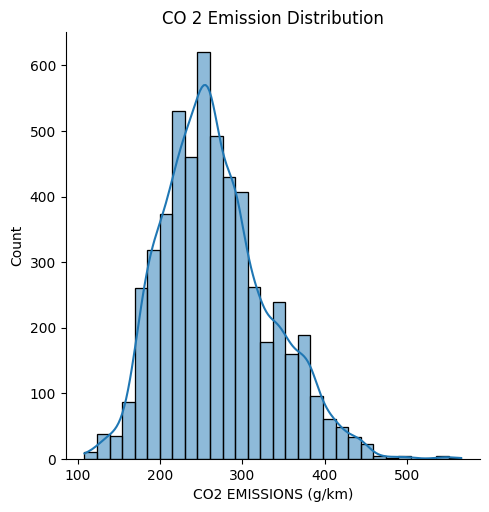

In [99]:
sns.displot(fuel_consumption['CO2 EMISSIONS (g/km)'], kde = True, bins = 30)
plt.title('CO 2 Emission Distribution')

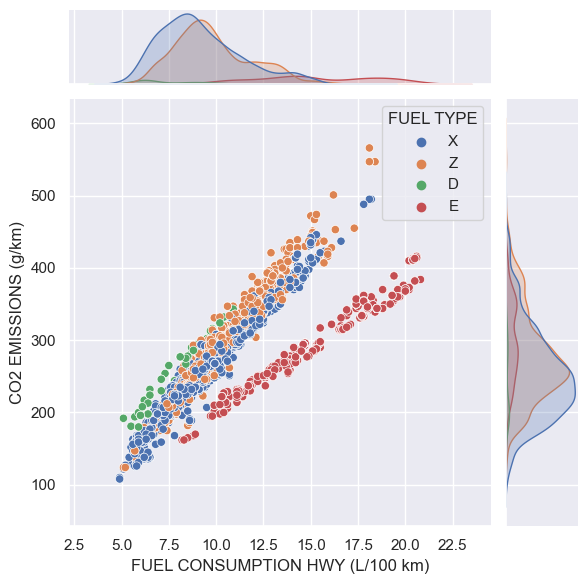

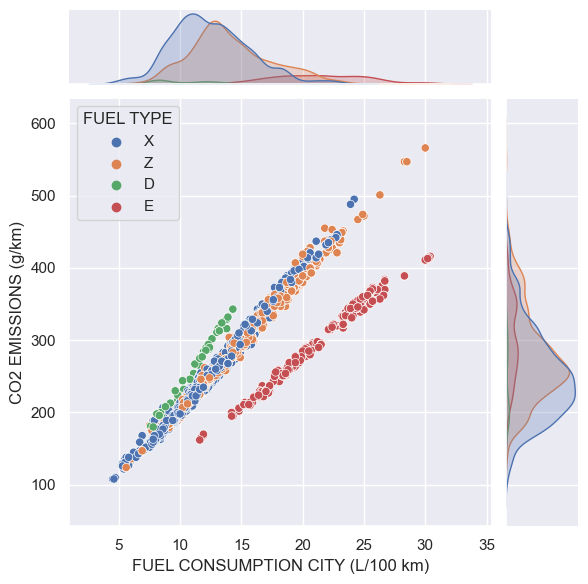

In [130]:
# Test the relationship between the categorical data and non-categorical data

sns.jointplot(x="FUEL CONSUMPTION HWY (L/100 km)",
                  y="CO2 EMISSIONS (g/km)",
                  hue="FUEL TYPE",
                  data=fuel_consumption)
sns.jointplot(x="FUEL CONSUMPTION CITY (L/100 km)",
                  y="CO2 EMISSIONS (g/km)",
                  hue="FUEL TYPE",
                  data=fuel_consumption)

plt.show()

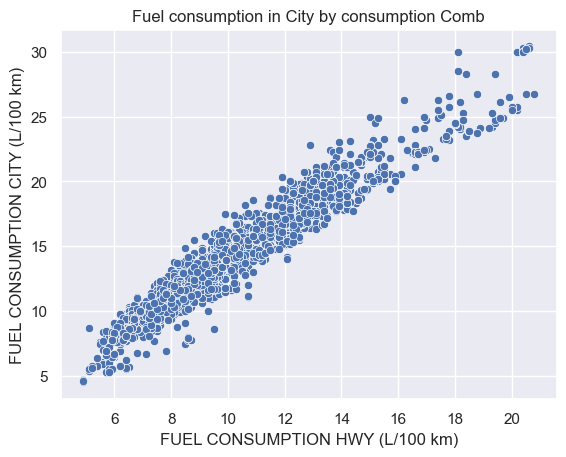

In [131]:
sns.scatterplot(x = 'FUEL CONSUMPTION HWY (L/100 km)', y = 'FUEL CONSUMPTION CITY (L/100 km)', data = fuel_consumption)
plt.title('Fuel consumption in City by fuel consumption in highway')
plt.show()

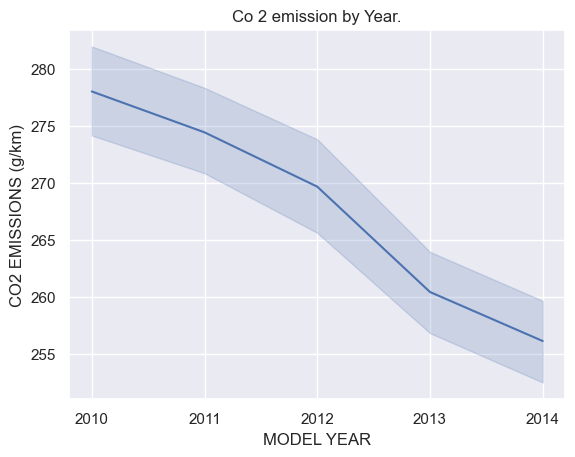

In [144]:
# To show if there is any improvement in the CO2 emission from 2010 to 2014.
# we need to plot the model year with the CO2emission.

sns.lineplot(data = fuel_consumption, x = "MODEL YEAR", y = "CO2 EMISSIONS (g/km)")
plt.title('Co 2 emission by Year.')
plt.show()

This show the rate of CO 2 emission has reduced from the year 2010 to year 2014.

In [146]:
categorical_df = fuel_consumption.select_dtypes(include = 'object')
non_categorical_df = fuel_consumption.select_dtypes(exclude='object')

### Using all the non-categorical variables to predict CO2 emission.

In [148]:
X_data = non_categorical_df.drop(['CO2 EMISSIONS (g/km)'], axis =1)
y_data = non_categorical_df['CO2 EMISSIONS (g/km)']

X_data.head()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg)
0,2.0,4.0,10.9,7.8,9.5,30.0
1,2.0,4.0,10.0,7.6,8.9,32.0
2,2.0,4.0,11.6,8.1,10.0,28.0
3,3.7,6.0,14.8,11.3,13.2,21.0
4,2.3,4.0,13.2,10.3,11.9,24.0


In [152]:
# split data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [154]:
# Define method for scaling the data.
def scale_data(X_train, X_test):
    #Scale the data 
    scale_data = MinMaxScaler()
    X_train = scale_data.fit_transform(X_train)
    X_test = scale_data.transform(X_test)
    return X_train, X_test

#Scale the splitted data
X_trainS, X_testS = scale_data(X_train, X_test)

In [156]:
# Define method for fitting the model and evaluation
def model_test(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test) 
    mean_squared = mean_squared_error(y_test,preds)
    print(f"The mean squared error is : {(mean_squared):.2f}")
    print(f"The root mean squared error is : {math.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination (R-squared score) is: {r2_score(y_test,preds):.2f}")

model1 = LinearRegression()
model2 = RandomForestRegressor()

# Run the model test using the linear regression model
model_test(model1, X_trainS, y_train, X_testS, y_test) 

The mean squared error is : 517.00
The root mean squared error is : 22.74
The result of the coefficient of determination (R-squared score) is: 0.87


In [157]:
# Check Performance of model2 (using the randomforestregressor)
model_test(model2, X_trainS, y_train, X_testS, y_test)

The mean squared error is : 36.15
The root mean squared error is : 6.01
The result of the coefficient of determination (R-squared score) is: 0.99


This shows that the Randomforest model is better as its -squared score is of a higher value.

### Exploratory Data Analysis 

Now we can look at how variable correlates to another to understand the data more.

We need to get a copy of the categorical variables before the convertion.

C:\Users\HP\AppData\Local\Temp\ipykernel_15632\3007749746.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = fuel_consumption.corr()


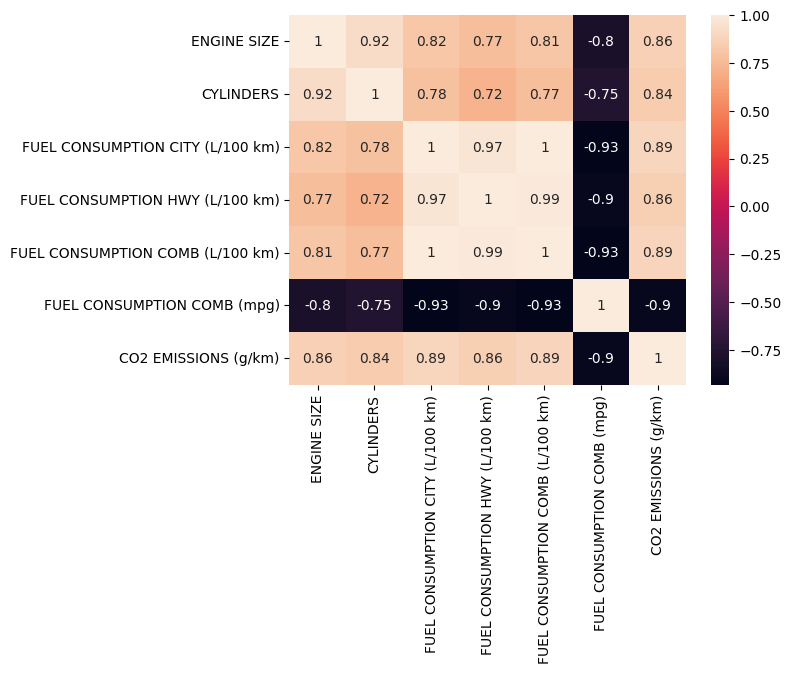

In [101]:
corr_matrix = fuel_consumption.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

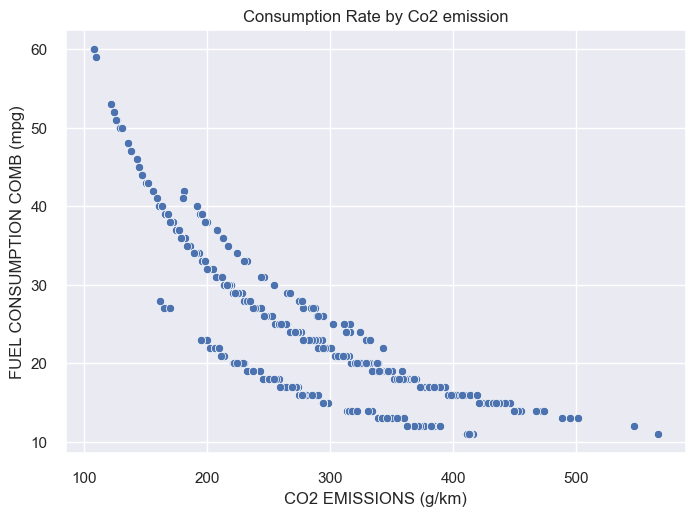

In [230]:
# combustion rate by co2 emission
sns.scatterplot(x = 'CO2 EMISSIONS (g/km)', y = 'FUEL CONSUMPTION COMB (mpg)', data = fuel_consumption)
plt.title('Consumption Rate by Co2 emission')
plt.show()

The more the fuel consumption the less the co2 emission rate.

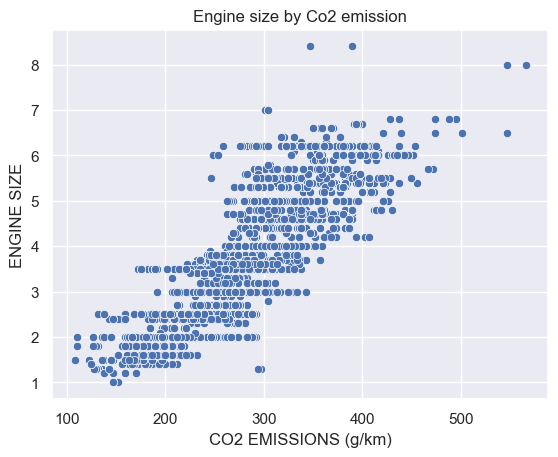

In [145]:
# combustion rate by co2 emission
sns.scatterplot(x = 'CO2 EMISSIONS (g/km)', y = 'ENGINE SIZE', data = fuel_consumption)
plt.title('Engine size by Co2 emission')
plt.show()

There is a positive correlation between the engine size and co2 emission

### Select Subset of data and predict CO 2 Emission

First subset based on analysis would be the fuel consumption (mpg), this has a correlation with the co2 emission and then the engine size

In [158]:
# Define the subset data 
subset1_X = non_categorical_df[['ENGINE SIZE', 'FUEL CONSUMPTION COMB (mpg)']]
subset1_y = non_categorical_df['CO2 EMISSIONS (g/km)']

# split data to train and test set
subset1X_train, subset1X_test, subset1y_train, subset1y_test = train_test_split(subset1_X, subset1_y, test_size=0.2, random_state=42)

#Scale the splitted data
subset1X_trainS, subset1X_testS = scale_data(subset1X_train, subset1X_test)

# Run the model test (for linearregression model)
model_test(model1, subset1X_trainS, subset1y_train, subset1X_testS, subset1y_test) 

The mean squared error is : 586.17
The root mean squared error is : 24.21
The result of the coefficient of determination (R-squared score) is: 0.86


In [159]:
# Run the model test (for Randomforest Regressor model)
model_test(model2, subset1X_trainS, subset1y_train, subset1X_testS, subset1y_test) 

The mean squared error is : 94.69
The root mean squared error is : 9.73
The result of the coefficient of determination (R-squared score) is: 0.98


Second subset based on the correlation graph would be the fuel_consumption city and the fuel consumption comb (L/100km)

In [209]:
# Define the subset data 
subset2_X = non_categorical_df[['FUEL CONSUMPTION COMB (L/100 km)', 'FUEL CONSUMPTION CITY (L/100 km)']]
subset2_y = non_categorical_df['CO2 EMISSIONS (g/km)']

# split data to train and test set
subset2X_train, subset2X_test, subset2y_train, subset2y_test = train_test_split(subset2_X, subset2_y, test_size=0.2, random_state=42)

#Scale the splitted data
subset2X_trainS, subset2X_testS = scale_data(subset2X_train, subset2X_test)

# Run the model test (for linearregression model)
model_test(model1, subset2X_trainS, subset2y_train, subset2X_testS, subset2y_test) 

The mean squared error is : 822.91
The root mean squared error is : 28.69
The result of the coefficient of determination (R-squared score) is: 0.80


In [210]:
# Run the model test (for Randomforest Regressor model)
model_test(model2, subset2X_trainS, subset2y_train, subset2X_testS, subset2y_test) 

The mean squared error is : 236.62
The root mean squared error is : 15.38
The result of the coefficient of determination (R-squared score) is: 0.94


### Categorical Variable to Target Variable.

#### Label Encoding 

In [162]:
# Label Encoding 
def encode(categorical_data):
    encoder_object = LabelEncoder()# declares an instance of the object
    encoder_data = encoder_object.fit_transform(categorical_df[[categorical_data]])# applies the object to data
    new_cat_df = pd.DataFrame(encoder_data, columns = [categorical_data]) # creates a dataframe
    new_df = pd.concat([non_categorical_df, new_cat_df], axis = 1) # appends the new dataframe to non_categorical dataframe
    return new_df

In [181]:
total_eval = pd.DataFrame(columns={'categorical data':[], 
                                'Train Accuracy':[], 
                                'Train F1 Score':[],
                                'Test Accuracy':[], 
                                'Test F1 Score':[]})

In [182]:
def categorical_to_target_variable(data):
    
    for idx, item in enumerate(data): 
        
        # Preprocess the data.
        dataframe = encode(item)
        X = dataframe.drop([item], axis = 1)
        y = dataframe[item]
        
        # Initialize the model.
        model = LogisticRegression()
        
        #split the data and fit the training set to model
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
        
        #split the train data to get the validation data.
        X,y=X_train,y_train
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # fit the model.
        model.fit(X_train, y_train)
        
        #Prediction of the validation data
        train_preds = model.predict(X_val)
        train_acc = accuracy_score(y_val,train_preds)
        train_f1 = f1_score(y_val, train_preds, average='weighted')
        
        # Prediction of the test data
        test_preds = model.predict(X_test)
        test_acc = accuracy_score(y_test,test_preds)
        test_f1 = f1_score(y_test, test_preds, average='weighted')
        
        total_eval.loc[total_eval.shape[0]] = [item, train_acc, train_f1, test_acc, test_f1]
        
categorical_data =  categorical_df.columns.values.tolist()

categorical_to_target_variable(categorical_data)
total_eval.head()

,categorical data,Train Accuracy,Train F1 Score,Test Accuracy,Test F1 Score
0,MODEL YEAR,0.220280,0.198446,0.221082,0.199795
1,MAKE,0.089744,0.046571,0.114739,0.063399
2,MODEL,0.015152,0.003710,0.020522,0.006774
3,VEHICLE CLASS,0.252914,0.175827,0.233209,0.160842
4,TRANSMISSION,0.251748,0.154674,0.261194,0.158652


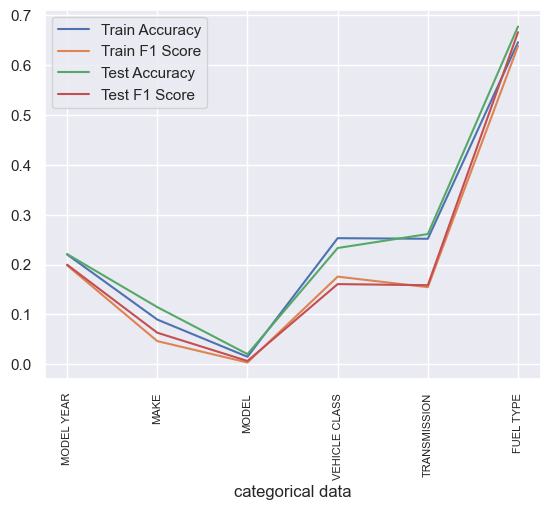

In [191]:
total_eval.plot(x="categorical data", y=["Train Accuracy", "Train F1 Score", "Test Accuracy", "Test F1 Score"])
plt.xticks(fontsize=8, rotation=90)
plt.show()

### Clustering (Internal and External Evaluations)

In [193]:
!pip3 install yellowbrick

     -------------------------------------- 282.6/282.6 kB 4.4 MB/s eta 0:00:00


In [194]:
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [213]:
# Groups of non_categorical data formed
df1 = non_categorical_df[['ENGINE SIZE', 'FUEL CONSUMPTION COMB (mpg)']]
df2 = non_categorical_df[['FUEL CONSUMPTION COMB (L/100 km)', 'FUEL CONSUMPTION CITY (L/100 km)']]
df3 = non_categorical_df[['CO2 EMISSIONS (g/km)', 'CYLINDERS', 'FUEL CONSUMPTION HWY (L/100 km)']]
groups = [df1, df2, df3]

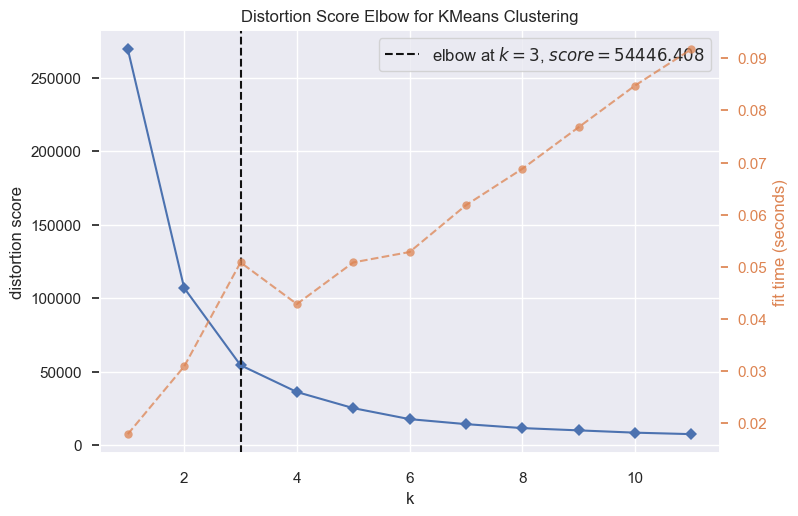

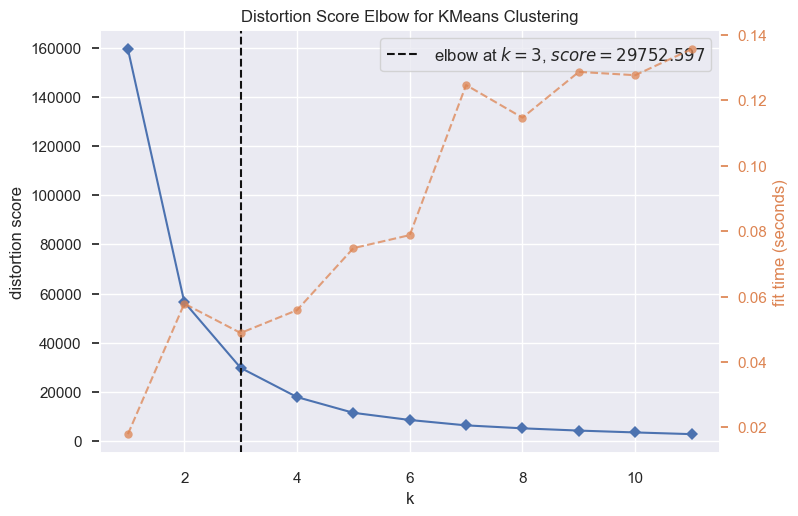

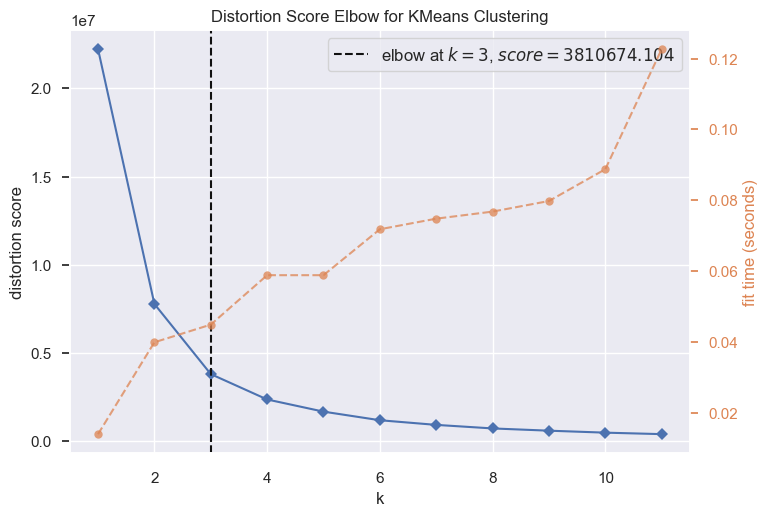

In [214]:
#df is the group - we have to group the data into 3, then compare the evaluation.
model = KMeans()
for i in groups:
    visualizer = KElbowVisualizer(model, k=(1,12)).fit(i)
    visualizer.show()

From the Visualizer we can see the best possible cluter is 3 for all groups.

In [198]:
def standardscale_data(df):
    #Scale the data 
    Sscale_data = StandardScaler()
    scaled_df = Sscale_data.fit_transform(df)
    return scaled_df

#### Group 1

In [200]:
# Group 1 Cluster fit
scaled_df1 = standardscale_data(df1)
kmeans_algo1 = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(scaled_df1)
print (kmeans_algo1.labels_)

[0 0 0 ... 1 1 1]


In [205]:
df1.head()

,ENGINE SIZE,FUEL CONSUMPTION COMB (mpg)
0,2.0,30.0
1,2.0,32.0
2,2.0,28.0
3,3.7,21.0
4,2.3,24.0


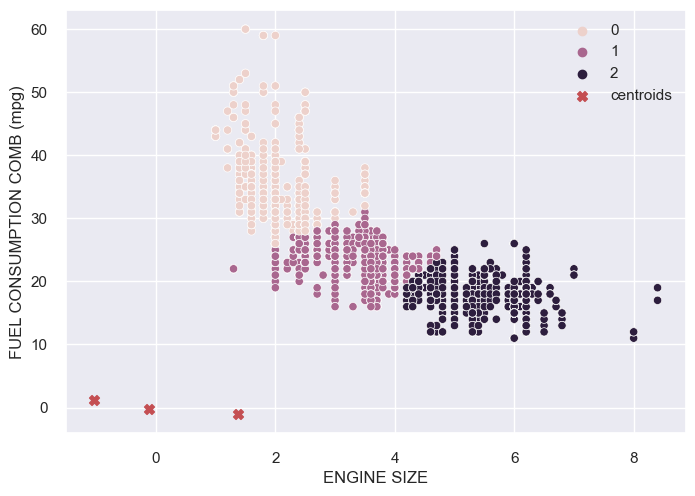

In [220]:
sns.scatterplot(data=df1, x="ENGINE SIZE", y="FUEL CONSUMPTION COMB (mpg)", hue=kmeans_algo1.labels_)
plt.scatter(kmeans_algo1.cluster_centers_[:,0], kmeans_algo1.cluster_centers_[:,1], 
            marker="X", c="r", s=50, label="centroids")
plt.legend()
plt.show()

In [202]:
# Group 1 Internal evaluation using silhouette score
sil_score1 = silhouette_score(scaled_df1,kmeans_algo1.labels_)
print (sil_score1)

0.494698964895793


In [207]:
# Group 1 External evaluation using normalized mutual information score
for idx, item in enumerate(categorical_data):
    Nmis1 = normalized_mutual_info_score(categorical_df[item], kmeans_algo1.labels_)
    print (f"The score of categorized data {item} is {Nmis1}")

The score of categorized data MODEL YEAR is 0.006188283149005637
The score of categorized data MAKE is 0.13787002173409282
The score of categorized data MODEL is 0.2396304529683738
The score of categorized data VEHICLE CLASS is 0.13967805295110744
The score of categorized data TRANSMISSION is 0.08411496430840942
The score of categorized data FUEL TYPE is 0.06494794610028724


For the first group the model is the best describe the group (group of engine size and fuel consumption comb (mpg)) with accuracy of 23.9% which is the highest of the categorical data.

#### Group 2

In [215]:
# Group 2 Cluster fit
scaled_df2 = standardscale_data(df2)
kmeans_algo2 = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(scaled_df2)
print (kmeans_algo2.labels_)

[0 0 0 ... 1 1 1]


In [216]:
df2.head()

,FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION CITY (L/100 km)
0,9.5,10.9
1,8.9,10.0
2,10.0,11.6
3,13.2,14.8
4,11.9,13.2


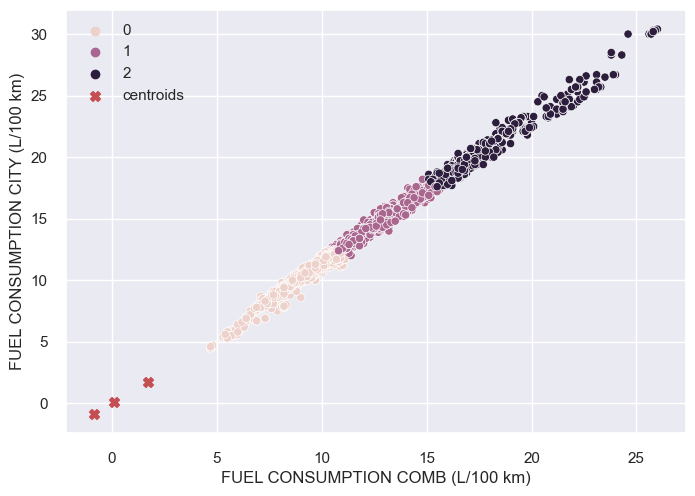

In [221]:
sns.scatterplot(data=df2, x="FUEL CONSUMPTION COMB (L/100 km)", y="FUEL CONSUMPTION CITY (L/100 km)", hue=kmeans_algo2.labels_)
plt.scatter(kmeans_algo2.cluster_centers_[:,0], kmeans_algo2.cluster_centers_[:,1], 
            marker="X", c="r", s=50, label="centroids")
plt.legend()
plt.show()

In [218]:
# Group 2 Internal evaluation using silhouette score
sil_score2 = silhouette_score(scaled_df2,kmeans_algo2.labels_)
print (sil_score2)

0.5289634413806857


In [219]:
# Group 2 External evaluation using normalized mutual information score
for idx, item in enumerate(categorical_data):
    Nmis2 = normalized_mutual_info_score(categorical_df[item], kmeans_algo2.labels_)
    print (f"The score of categorized data {item} is {Nmis2}")

The score of categorized data MODEL YEAR is 0.006038402614214874
The score of categorized data MAKE is 0.1156976037489384
The score of categorized data MODEL is 0.2050303162299298
The score of categorized data VEHICLE CLASS is 0.12330799995098272
The score of categorized data TRANSMISSION is 0.08635979713492907
The score of categorized data FUEL TYPE is 0.13753005066052287


For the group 2 as well the model of the car comes out to be the best in describing the group with the percentage of 20.5 for the external evaluation.

#### Group 3

In [222]:
# Group 3 Cluster fit
scaled_df3 = standardscale_data(df3)
kmeans_algo3 = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(scaled_df3)
print (kmeans_algo3.labels_)

[2 2 2 ... 0 0 0]


In [223]:
df3.head()

,CO2 EMISSIONS (g/km),CYLINDERS,FUEL CONSUMPTION HWY (L/100 km)
0,219.0,4.0,7.8
1,205.0,4.0,7.6
2,230.0,4.0,8.1
3,304.0,6.0,11.3
4,274.0,4.0,10.3


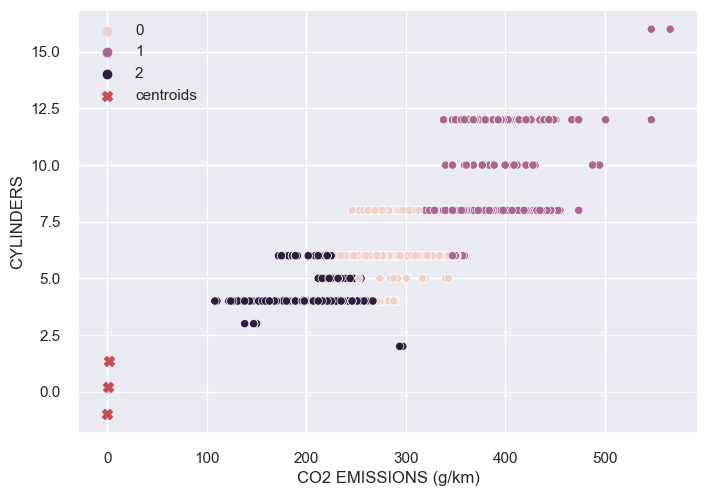

In [227]:
sns.scatterplot(data=df3, x="CO2 EMISSIONS (g/km)", y="CYLINDERS", hue=kmeans_algo3.labels_)
plt.scatter(kmeans_algo3.cluster_centers_[:,0], kmeans_algo3.cluster_centers_[:,1], 
            marker="X", c="r", s=50, label="centroids")
plt.legend()
plt.show()

In [228]:
# Group 3 Internal evaluation using silhouette score
sil_score3 = silhouette_score(scaled_df3,kmeans_algo3.labels_)
print (sil_score3)

0.47863795574111545


In [229]:
# Group 3 External evaluation using normalized mutual information score
for idx, item in enumerate(categorical_data):
    Nmis3 = normalized_mutual_info_score(categorical_df[item], kmeans_algo3.labels_)
    print (f"The score of categorized data {item} is {Nmis3}")

The score of categorized data MODEL YEAR is 0.002840343320036692
The score of categorized data MAKE is 0.13988855439376935
The score of categorized data MODEL is 0.22736845609247774
The score of categorized data VEHICLE CLASS is 0.13689703215115342
The score of categorized data TRANSMISSION is 0.10217575304591153
The score of categorized data FUEL TYPE is 0.07885219322162602


For the last group, the model is also the best feature to describe the group with a score of 22.7%.

#### Summary

The model best describes the 3 groups formed, although the value is small but with the ground truth unknown for the groups the closest data that could be clustered more accurately is the model data.

In [ ]:
# TODO
# 1. Add more exploratory graphs. (pairplots, scatter plot, box plots etc, histograms as well)
# 2. improve on my clustering 
# 3. 